In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import glob

dpid_323_2017: wide range data distribution(minimum value of Imon is increased)

dpid_320_2017: abnormal data distributin(Imon suddenly incresed)

dpid_325_2017: two gradiant data(Imon suddenly changed) 

dpid_324_2017: standard deviation is high, but seemly normal






/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


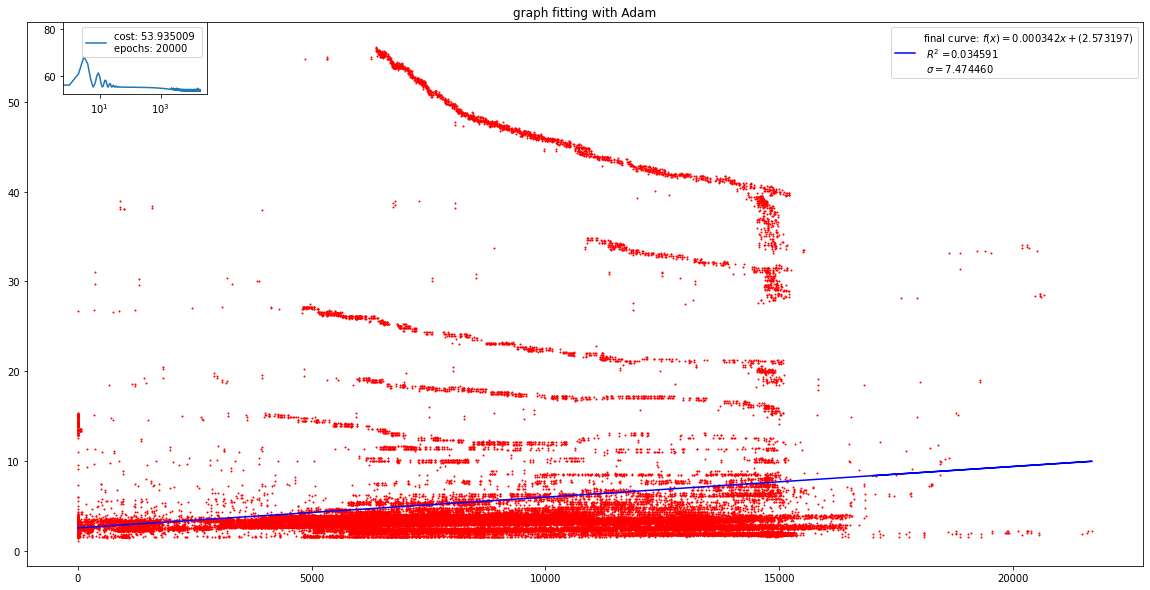

In [ ]:
os.chdir('/content/drive/Shareddrives/RPCs/2017') #set directory path
file_list = glob.glob('*.csv') #load name list .csv

''' #load all file in path
for file_name in file_list:
  csv_test1 = pd.read_csv(file_list, header =None)  #set path
'''
#Train data: dpid_381_2017.csv
csv_test1 = pd.read_csv("/content/drive/Shareddrives/RPCs/2017/dpid_320_2017.csv", header =None)  #set path

preprocessing(csv_test1)
Linear_Regression(csv_test1["inst_lumi"], csv_test1["Imon"])




Renew

In [ ]:
fig, axes = plt.subplots(2, 4)
fig.patch.set_facecolor('w')
plt.figure(figsize=(20,7))
fig.set_size_inches((40, 15)) 

axes[0,0].scatter(csv_test1['Imon_change_date'], csv_test1['Imon'], alpha=0.7, s=2)

axes[0,1].scatter(csv_test1["Imon_change_date"],csv_test1["Vmon"], s= 2 ,c='r')
axes[0,1].axhline(y=np.mean(csv_test1["Vmon"]), color = 'r')
axes[0,1].plot(csv_test1["Imon_change_date"],csv_test1["Vmon"])

axes[0,2].plot(csv_test1['Imon_change_date'], np.log(csv_test1['temp']), alpha=0.7)
axes[0,2].scatter(csv_test1['Imon_change_date'], np.log(csv_test1['temp']), s= 2 ,c='r')
axes[0,2].axhline(y=np.mean(np.log(csv_test1['temp'])), color = 'r')

axes[0,3].plot(csv_test1['Imon_change_date'], csv_test1['press'], alpha=0.7)
axes[0,3].axhline(y=np.mean(csv_test1['press']), color = 'r')
axes[0,3].scatter(csv_test1['Imon_change_date'], (csv_test1['press']), s= 2 ,c='r')

axes[1,0].scatter(csv_test1['Imon_change_date'], csv_test1['relative_humodity']/csv_test1['dew_point'], alpha=0.7, s=2)
axes[1,0].axhline(y=np.mean(csv_test1['relative_humodity']/csv_test1['dew_point']), color = 'r')


axes[1,1].scatter(csv_test1['Imon_change_date'],(csv_test1['Imon']), alpha=0.7, s=2)
axes2 = axes[1,1].twinx()
axes2.scatter(csv_test1['Imon_change_date'],(csv_test1['Vmon']),c='r',s=2.5)

axes[1,2].scatter(csv_test1['Imon_change_date'],(csv_test1['Imon']), alpha=0.7, s=2.5)
axes2 = axes[1,2].twinx()
axes2.scatter(csv_test1['Imon_change_date'],np.log(csv_test1['temp']),c='r', s= 2.5)

axes[1,3].scatter(csv_test1['Imon_change_date'],(csv_test1['Imon']), alpha=0.7, s=2.5,)
axes2 = axes[1,3].twinx()
axes2.scatter(csv_test1['Imon_change_date'],(csv_test1['press']),c='r',s=2.5)
#axes[1,1].scatter(csv_test1['Imon_change_date'],(csv_test1['Vmon']), alpha=0.7, s=2)
#axes[1,2].scatter(csv_test1['Imon_change_date'], csv_test1['Imon']/csv_test1['relative_humodity'], alpha=0.7, s=2)
#axes[1,3].scatter(csv_test1['Imon_change_date'],csv_test1['Imon']/ csv_test1['dew_point'], alpha=0.7, s=2)
#axes[1,2].scatter(csv_test1['Imon_change_date'],csv_test1['Imon']/ csv_test1['press'], alpha=0.7, s=2)
#axes[1,3].scatter(csv_test1['Imon_change_date'],delta_time, alpha=0.7, s=2)


#plt.savefig('../../assets/images/markdown_img/pl_subplot_180515.svg')
plt.show()

In [ ]:
#작업중
day_of_year = csv_test1['Imon_change_date'].dt.dayofyear
day_of_year_list = list(day_of_year)

index_list=[]
for i in day_of_year_list:
  pass

#try-except is for avoid index error
mylist = []
try:
  for i in range(len(day_of_year_list)):
    delta_day = day_of_year_list[i+1]-day_of_year_list[i]
  
except:
  pass

#history = []
mylist = []
try:
  mylist.append(csv_test1.loc[0].name)
#  history.append(csv_test1['Imon_change_date'][0])

  for i in range(len(day_of_year_list)+1):
    if csv_test1['Imon_change_date'][i+1].dayofyear - csv_test1['Imon_change_date'][i].dayofyear >= 5:
#      history.append(csv_test1['Imon_change_date'][i])
#      history.append(csv_test1['Imon_change_date'][i+1])
      mylist.append(csv_test1.loc[i].name)

except:
  pass
mylist.append(csv_test1.loc[len(day_of_year_list)].name)


plt.figure(figsize=(20,10)).patch.set_facecolor('w')
try:
  for i in range(len(mylist)+1):
    start = mylist[i]
    end = mylist[i+1]
    Linear_Regression(csv_test1['inst_lumi'][start:end],csv_test1['Imon'][start:end],fun)   
    #plt.scatter(csv_test1['inst_lumi'][start:end],csv_test1['Imon'][start:end],label = '%s'%mylist[i], s = 2)
    
except:
  pass
  #plt.scatter(csv_test1['inst_lumi'][start:end],csv_test1['Imon'][start:end],label = '%s'%mylist[i], s= 2)

plt.legend()
plt.show()

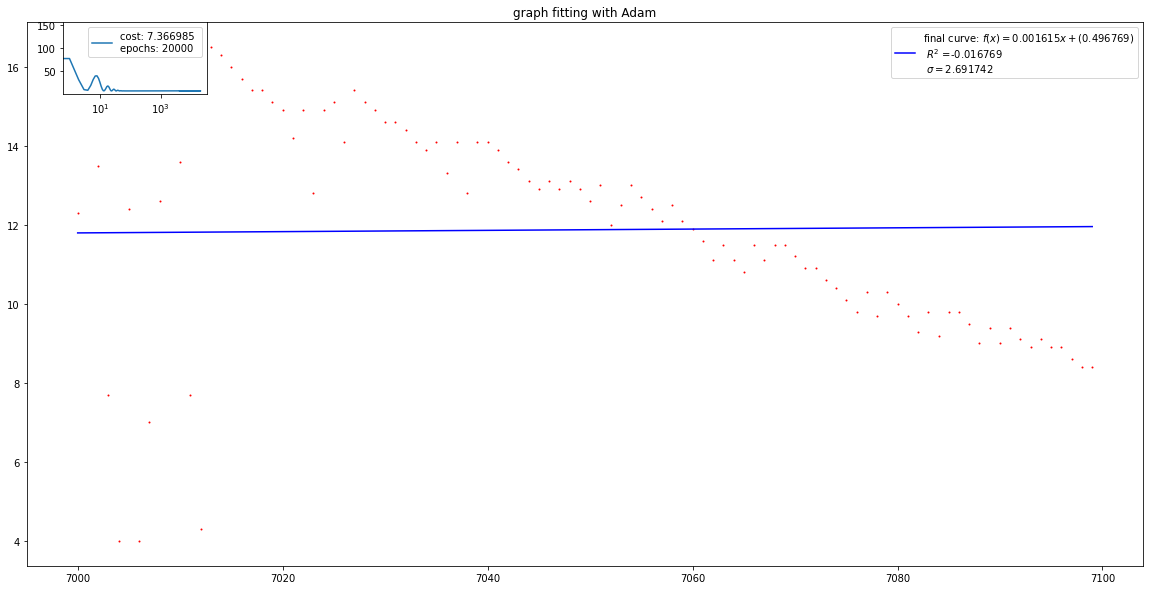

In [6]:
os.chdir('/content/drive/Shareddrives/RPCs/2017') #set directory path
file_list = glob.glob('*.csv') #load name list .csv

''' #load all file in path
for file_name in file_list:
  csv_test1 = pd.read_csv(file_list, header =None)  #set path
'''
#Train data: dpid_381_2017.csv
csv_test1 = pd.read_csv("/content/drive/Shareddrives/RPCs/2017/dpid_381_2017.csv", header =None)  #set path
start = 7000
end = 7100
preprocessing(csv_test1)
Linear_Regression(csv_test1.index[start:end], csv_test1["Imon"][start:end])


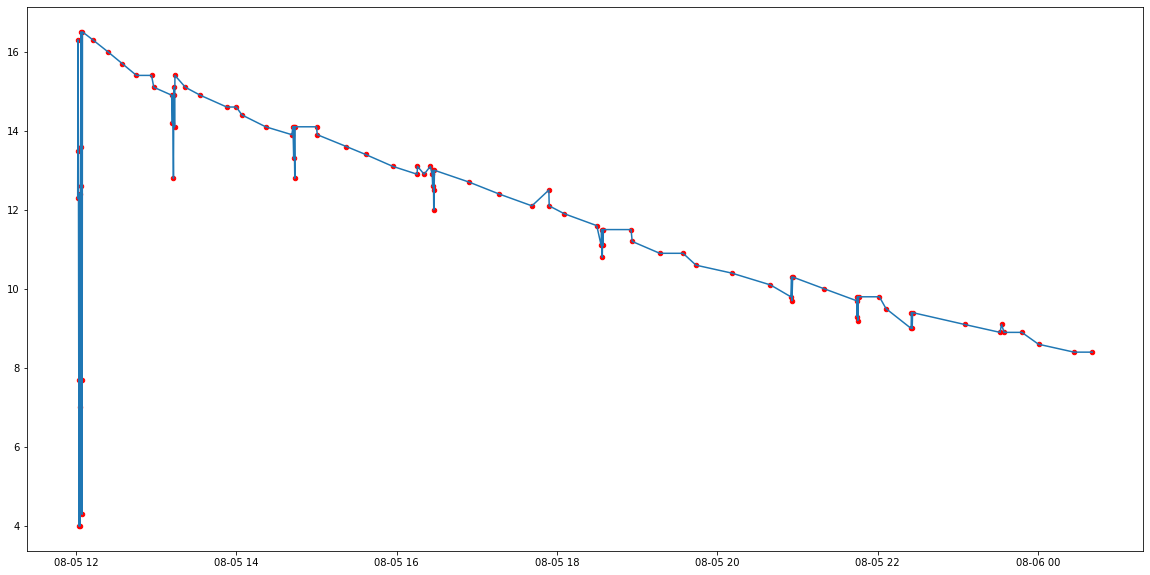

In [9]:

plt.figure(figsize=(20,10)).patch.set_facecolor('w')

 #load all file in path
csv_test1 = pd.read_csv("/content/drive/Shareddrives/RPCs/2017/dpid_381_2017.csv", header =None)  #set path
csv_test1 = preprocessing(csv_test1)
start = 7000
end = 7100
x = csv_test1["Imon_change_date"][start:end]
y =csv_test1["Imon"][start:end]
plt.plot(x,y)
plt.scatter(x,y,s=20, c ="r")


plt.show()

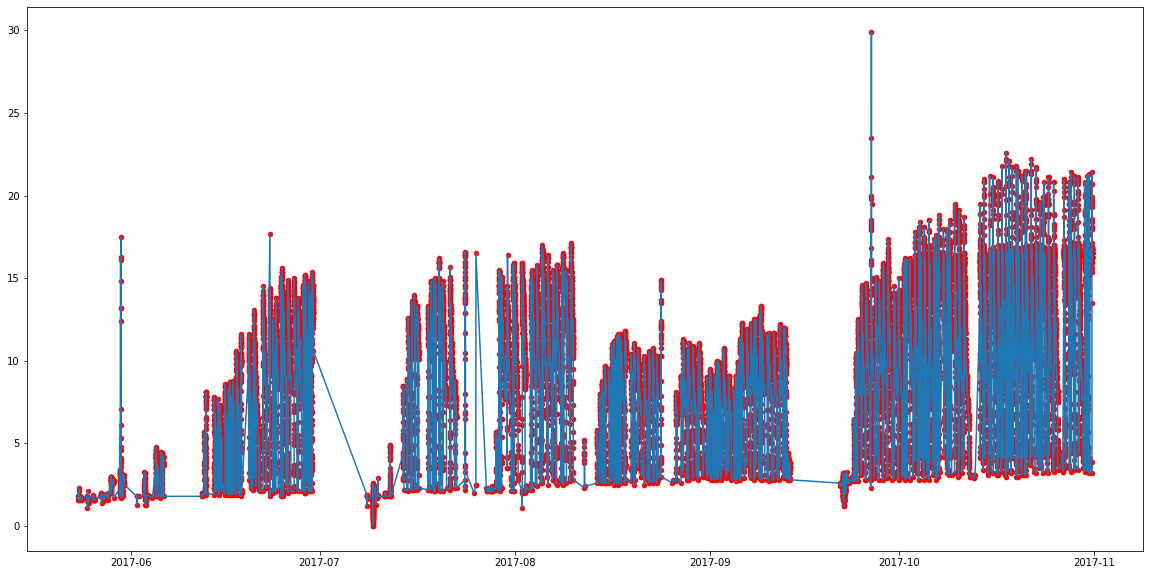

In [47]:
plt.figure(figsize=(20,10)).patch.set_facecolor('w')

 #load all file in path
csv_test1 = pd.read_csv("/content/drive/Shareddrives/RPCs/2017/dpid_381_2017.csv", header =None)  #set path
csv_test1 = preprocessing(csv_test1)

x = csv_test1["Imon_change_date"]
y =csv_test1["Imon"]
plt.plot(x,y)
plt.scatter(x,y,s=20, c ="r")


for i in range(len(y)+1):
  mag = np.abs(y[i+1]-y[i])



plt.show()

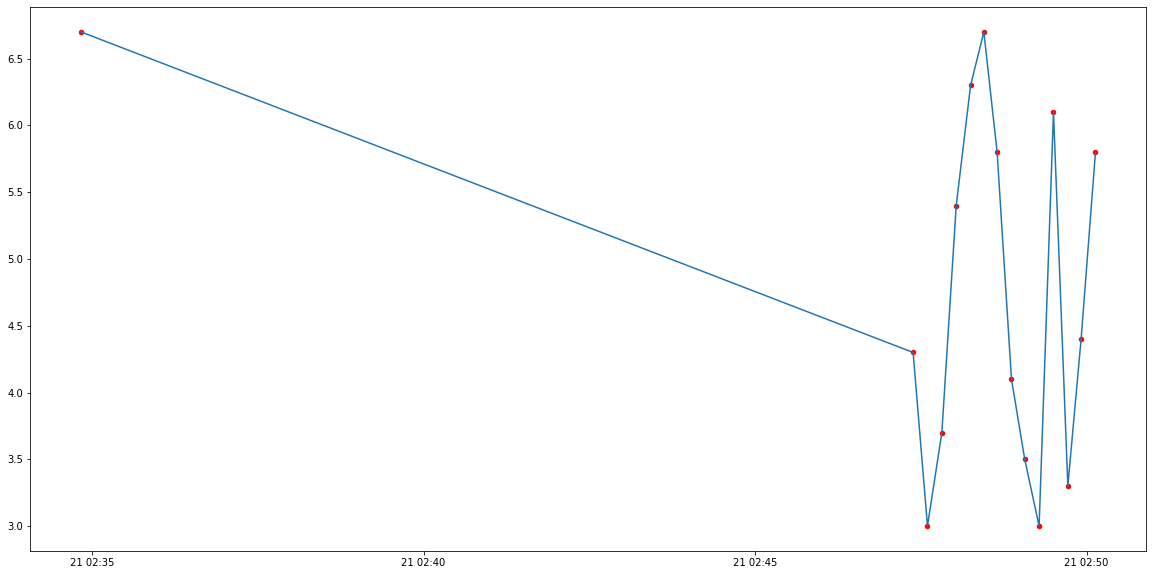

In [16]:
plt.figure(figsize=(20,10)).patch.set_facecolor('w')

 #load all file in path
csv_test1 = pd.read_csv("/content/drive/Shareddrives/RPCs/2017/dpid_381_2017.csv", header =None)  #set path
csv_test1 = preprocessing(csv_test1)
start = 9030
end = 9045
x = csv_test1["Imon_change_date"][start:end]
y =csv_test1["Imon"][start:end]
plt.plot(x,y)
plt.scatter(x,y,s=20, c ="r")



In [ ]:
os.chdir('/content/drive/Shareddrives/RPCs/2017') #set directory path
file_list = glob.glob('*.csv') #load name list .csv

#load all file in path
for file_name in file_list[:]:
  csv_test1 = pd.read_csv(file_name, header =None)  #set path
  preprocessing(csv_test1)
  Linear_Regression(csv_test1["inst_lumi"], csv_test1["Imon"])
  plt.savefig('/content/drive/Shareddrives/RPCs/LRfig_modified/%s.jpg'%file_name)



In [49]:
A = pd.to_numeric(csv_test1['Imon_change_date'],errors='coerce')

In [61]:
csv_test1['Imon_change_date'][1]-csv_test1['Imon_change_date'][0]

Timedelta('0 days 00:49:54')